# Working with Time Series

Pandas was developed in the context of financial modelling

Extensive set of tools to work with dates, times and time-indexed data

## Dates and Times in Python

`datetime` is the basic Python object for working with dates and times

In [2]:
from datetime import datetime
datetime(year=2022, month=10, day=29)

datetime.datetime(2022, 10, 29, 0, 0)

In [3]:
from dateutil import parser
date = parser.parse("29th of October, 2022")
date

datetime.datetime(2022, 10, 29, 0, 0)

In [4]:
date.strftime('%A')

'Saturday'

In [5]:
date.strftime('%a')

'Sat'

In [6]:
date.strftime('%d')

'29'

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

## Typed arrays of times: NumPy's `datetime64`

The `datetime64` dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly:

In [7]:
import numpy as np
date = np.array('2022-10-28', dtype=np.datetime64)
date

array('2022-10-28', dtype='datetime64[D]')

In [14]:
date + np.arange(12)

array(['2022-10-28', '2022-10-29', '2022-10-30', '2022-10-31',
       '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04',
       '2022-11-05', '2022-11-06', '2022-11-07', '2022-11-08'],
      dtype='datetime64[D]')

## Dates and times in pandas: best of both world

Pandas builds upon all the tools just discussed to provide a `Timestamp` object:

In [12]:
import pandas as pd
date = pd.to_datetime("10th of October, 2023")
date

Timestamp('2023-10-10 00:00:00')

In [13]:
date.strftime('%A')

'Tuesday'

In [14]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2023-10-10', '2023-10-11', '2023-10-12', '2023-10-13',
               '2023-10-14', '2023-10-15', '2023-10-16', '2023-10-17',
               '2023-10-18', '2023-10-19', '2023-10-20', '2023-10-21'],
              dtype='datetime64[ns]', freq=None)

In [15]:
date + pd.to_timedelta(np.arange(12), 's')

DatetimeIndex(['2023-10-10 00:00:00', '2023-10-10 00:00:01',
               '2023-10-10 00:00:02', '2023-10-10 00:00:03',
               '2023-10-10 00:00:04', '2023-10-10 00:00:05',
               '2023-10-10 00:00:06', '2023-10-10 00:00:07',
               '2023-10-10 00:00:08', '2023-10-10 00:00:09',
               '2023-10-10 00:00:10', '2023-10-10 00:00:11'],
              dtype='datetime64[ns]', freq=None)

In [19]:
pd.to_timedelta?

## Pandas Time Series: Indexing by Time
Where the Pandas time series tools really become useful is when you begin to index data by timestamps.

In [17]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [18]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

There are additional special date-only indexing operations, such as passing a year to obtain a slice of all data from that year:

In [21]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [26]:
data['2015-07']

2015-07-04    2
dtype: int64

## Pandas Time Series Data Structures

The most fundamental of these date/time objects are the `Timestamp` and `DatetimeIndex` objects. 

While these class objects can be invoked directly, it is more common to use the `pd.to_datetime()` function, which can parse a wide variety of formats:

In [27]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates


DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

A `TimedeltaInde` is created, for example, when a date is subtracted from another:

In [28]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

## Regular sequences: `pd.date_range()`

To make the creation of regular date sequences more convenient, Pandas offers a few functions for this purpose: 

- `pd.date_range()` for timestamps 
- `pd.period_range()` for periods
- `pd.timedelta_range()` for time deltas

In [29]:
pd.date_range('2015-07-03', '2015-07-10',5)

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-04 18:00:00',
               '2015-07-06 12:00:00', '2015-07-08 06:00:00',
               '2015-07-10 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [26]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [27]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [29]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [30]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

# Frequencies and Offsets

Fundamental to these Pandas time series tools is the concept of a frequency or date offset.

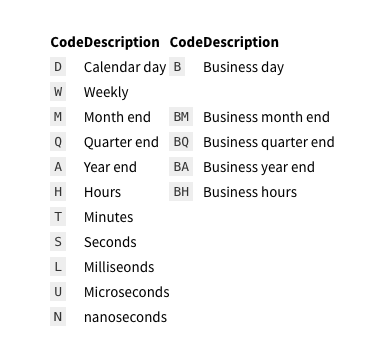

# Resampling, Shifting, and Windowing

The ability to use dates and times as indices to intuitively organize and access data is an important piece of the Pandas time series tools.



In [41]:
!pip install pandas-datareader

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [42]:
from pandas_datareader import data

goog = data.DataReader('GOOG', 'yahoo', start='2012', end='2023')
goog.tail()

ModuleNotFoundError: No module named 'pandas_datareader'

In [38]:
goog = goog['Close']

NameError: name 'goog' is not defined

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; 
seaborn.set(rc={'figure.figsize':(11.7,8.27)}) 
seaborn.set()


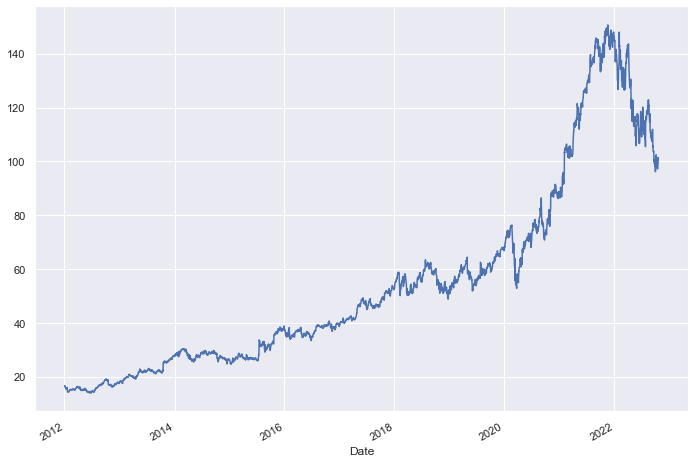

In [50]:
goog.plot();

## Resampling and converting frequencies

One common need for time series data is resampling at a higher or lower frequency. 

This can be done using the `resample()` method, or the much simpler `asfreq()` method. 

The primary difference between the two is that `resample()` is fundamentally a __data aggregation__, while `asfreq()` is fundamentally a __data selection.__

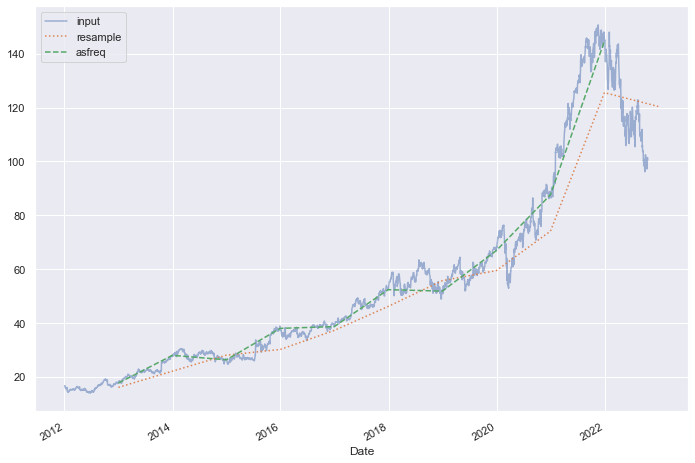

In [51]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

Notice the difference: at each point, `resample` reports the average of the previous year, while `asfreq` reports the value at the end of the year.

In [52]:
goog.resample?

## Time-shifts

Another common time series-specific operation is shifting of data in time:

- `shift()` shifts the data

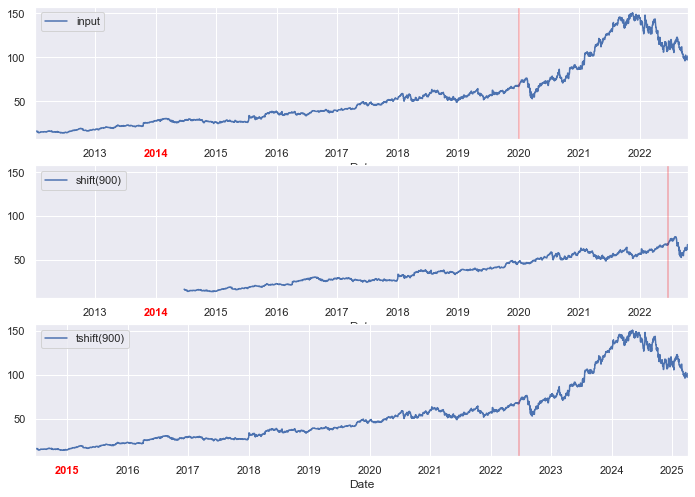

In [58]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.shift(900, freq="D").plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2020-1-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

A common context for this type of shift is in computing differences over time. For example, we use shifted values to compute the one-year return on investment for Google stock over the course of the dataset:

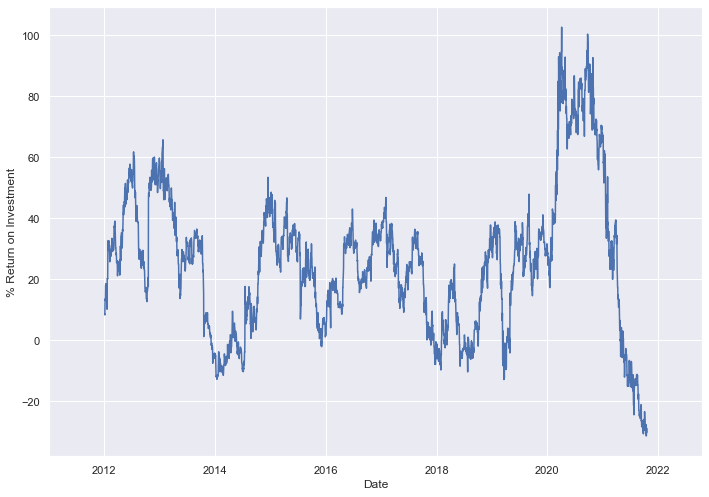

In [59]:
ROI = 100 * (goog.shift(-365, freq='D') / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

The most profitable times to invest in Google have been (unsurprisingly, in retrospect) shortly after the effects of the pandemic set in at the start of 2020

# Summary

We've looked at datetime objects and how these can be used in Pandas

- `Timestamp` replaces `datetime` in Pandas. 
    - Has an associated `DatetimeIndex`
- `Period` type encodes a frequency based interval.
    - Has an associated `PeriodIndex`
- `Timedelta` encodes the differences in times.
    - Has an associated `TimedeltaIndex`